# Analysing Stock Market Data using API

The following project aims to retrieve and analyse stock market data from Quandl API

First install the following packages:
- conda install quandl
- conda install pandas-datareader

## Getting Data from Quandl

We need to get the stock data in workable format. Stock data can be obtained from Yahoo! Finance, Google Finance, or other sources. 

We will use Quandl, a provider of community-maintained financial and economic data

In [3]:
import pandas as pd
import quandl
import datetime

In [4]:
# we will look at stock prices over the past year, starting at January 1, 2018
start = datetime.datetime(2018,1,1)
end = datetime.date.today()
 
# we will get Apple stock data; Apple's ticker symbol is 'AAPL'
s = "AAPL"

# quandl will return a pandas DataFrame
apple = quandl.get("WIKI/" + s, start_date=start, end_date=end)
 
# check the datatype
type(apple)

pandas.core.frame.DataFrame

In [5]:
# view the data
apple.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-01-02,170.16,172.30,169.26,172.26,25048048.0,0.0,1.0,170.16,172.30,169.26,172.26,25048048.0
2018-01-03,172.53,174.55,171.96,172.23,28819653.0,0.0,1.0,172.53,174.55,171.96,172.23,28819653.0
2018-01-04,172.54,173.47,172.08,173.03,22211345.0,0.0,1.0,172.54,173.47,172.08,173.03,22211345.0
2018-01-05,173.44,175.37,173.05,175.00,23016177.0,0.0,1.0,173.44,175.37,173.05,175.00,23016177.0
2018-01-08,174.35,175.61,173.93,174.35,20134092.0,0.0,1.0,174.35,175.61,173.93,174.35,20134092.0


## Visualising Stock Data

Populating the interactive namespace from numpy and matplotlib


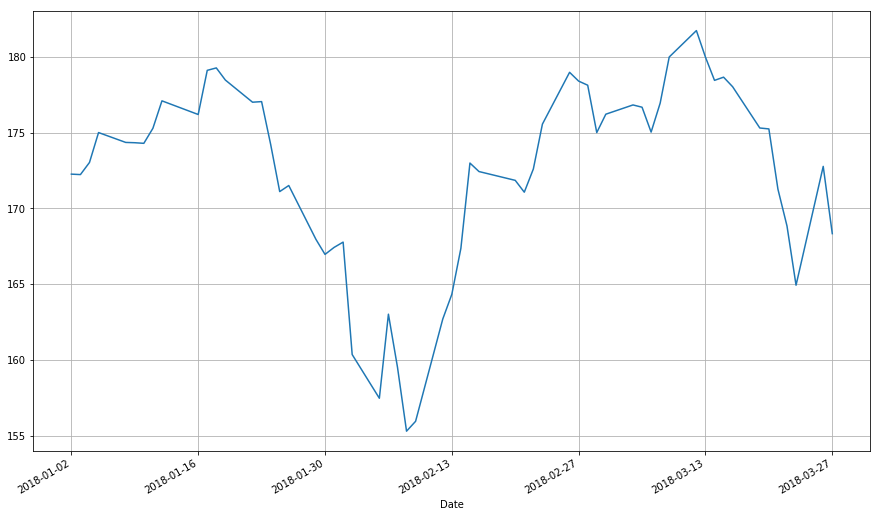

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# control the default size of figures in Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # change the size of plots
 
# plot the adjusted closing price of AAPL
apple["Adj. Close"].plot(grid = True)


We will get stock data for some other tech companies and plot their adjusted close together

In [8]:
microsoft, google = (quandl.get("WIKI/" + s, start_date=start, end_date=end) for s in ["MSFT", "GOOG"])
 
# we will create a DataFrame consisting of the adjusted closing price of these stocks, 
# first by making a list of these objects and using the join method
stocks = pd.DataFrame({"AAPL": apple["Adj. Close"],
                      "MSFT": microsoft["Adj. Close"],
                      "GOOG": google["Adj. Close"]})
 
stocks.head()

,AAPL,MSFT,GOOG
Date,,,
2018-01-02,172.26,85.95,1065.00
2018-01-03,172.23,86.35,1082.48
2018-01-04,173.03,87.11,1086.40
2018-01-05,175.00,88.19,1102.23
2018-01-08,174.35,88.28,1106.94


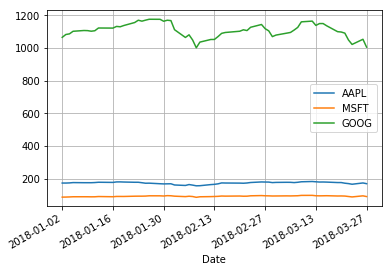

In [9]:
stocks.plot(grid = True)

What’s wrong with this chart? While absolute price is important (pricy stocks are difficult to purchase, which affects not only their volatility but your ability to trade that stock), when trading, we are more concerned about the relative change of an asset rather than its absolute price. Google’s stocks are much more expensive than Apple’s or Microsoft’s, and this difference makes Apple’s and Microsoft’s stocks appear much less volatile than they truly are (that is, their price appears to not deviate much).

One solution would be to use two different scales when plotting the data; one scale will be used by Apple and Microsoft stocks, and the other by Google.

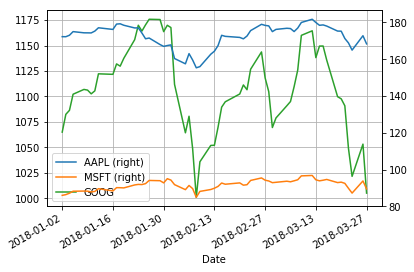

In [10]:
stocks.plot(secondary_y = ["AAPL", "MSFT"], grid = True)

A “better” solution, though, would be to plot the information we actually want: the stock’s returns. This involves transforming the data into something more useful for our purposes. There are multiple transformations we could apply.

One transformation would be to consider the stock’s return since the beginning of the period of interest. In other words, we plot:

Return = (Current Price / Price At Beginning)

In [11]:
# df.apply(arg) will apply the function arg to each column in df, 
# and return a DataFrame with the result

# Recall that lambda x is an anonymous function accepting parameter x;
# in this case, x will be a pandas Series object
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head() - 1

,AAPL,MSFT,GOOG
Date,,,
2018-01-02,0.000000,0.000000,0.000000
2018-01-03,-0.000174,0.004654,0.016413
2018-01-04,0.004470,0.013496,0.020094
2018-01-05,0.015906,0.026062,0.034958
2018-01-08,0.012133,0.027109,0.039380


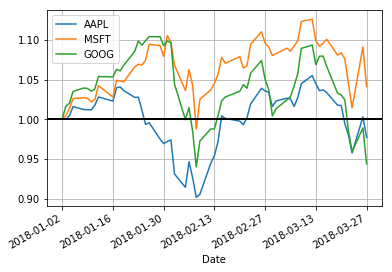

In [16]:
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

This is a much more useful plot. We can now see how profitable each stock was since the beginning of the period. Furthermore, we see that these stocks are highly correlated; they generally move in the same direction, a fact that was difficult to see in the other charts.

Alternatively, we could plot the change of each stock per day. One way to do so would be to plot the percentage increase of a stock when comparing day t to day t + 1, with the formula:

growth = ((pricet+1 - pricet) / pricet))

or (as an increase):

increase = ((pricet - pricet-1)/ pricet)

These formulas are not the same and can lead to differing conclusions, but there is another way to model the growth of a stock: with log differences:

change = log(pricet) - log(pricet-1)

In [17]:
# we use NumPy's log function
import numpy as np
 
stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1
stock_change.head()

,AAPL,MSFT,GOOG
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,-0.000174,0.004643,0.016280
2018-01-04,0.004634,0.008763,0.003615
2018-01-05,0.011321,0.012322,0.014466
2018-01-08,-0.003721,0.001020,0.004264


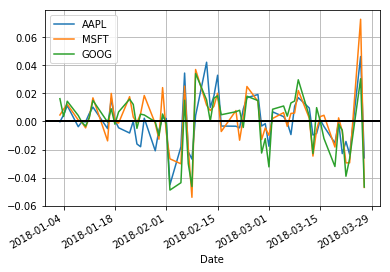

In [18]:
stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)

Which transformation do you prefer? Looking at returns since the beginning of the period make the overall trend of the securities in question much more apparent. Changes between days, though, are what more advanced methods actually consider when modelling the behavior of a stock. so they should not be ignored.

We often want to compare the performance of stocks to the performance of the overall market. SPY, which is the ticker symbol for the SPDR S&P 500 exchange-traded mutual fund (ETF), is a fund that attempts only to imitate the composition of the S&P 500 stock index, and thus represents the value in “the market.”

SPY data is not available for free from Quandl, so I will get this data from Yahoo! Finance. (I don’t have a choice.)

Below I get data for SPY and compare its performance to the performance of our stocks.

In [22]:
spyderdat = pd.read_csv(r"C:\projectdatasets\HistoricalQuotes.csv")  

In [23]:
spyderdat.head()

,date,close,volume,open,high,low
0,16:00,248.07,"184,625,584",242.60,248.0700,238.96
1,26/12/2018,246.18,217567600,235.97,246.1800,233.76
2,24/12/2018,234.34,147311600,239.04,240.8355,234.27
3,21/12/2018,240.70,252779300,246.74,249.7100,239.98
4,20/12/2018,247.17,247438000,249.86,251.6200,244.65


In [24]:
spyderdat = pd.DataFrame(spyderdat.loc[:, ["open", "high", "low", "close", "close"]].iloc[1:].as_matrix(),
                         index=pd.DatetimeIndex(spyderdat.iloc[1:, 0]),
                         columns=["Open", "High", "Low", "Close", "Adj Close"]).sort_index()

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [25]:
spyder = spyderdat.loc[start:end]

In [26]:
spyder.head()

,Open,High,Low,Close,Adj Close
date,,,,,
2018-01-02,281.07,283.06,280.6800,281.58,281.58
2018-01-03,271.41,273.17,266.0000,267.70,267.70
2018-01-05,263.87,265.10,262.1100,264.98,264.98
2018-01-06,272.41,273.94,272.3300,273.60,273.60
2018-01-08,281.56,282.13,280.1315,280.86,280.86


In [27]:
stocks = stocks.join(spyder.loc[:, "Adj Close"]).rename(columns={"Adj Close": "SPY"})
stocks.head()

,AAPL,MSFT,GOOG,SPY
Date,,,,
2018-01-02,172.26,85.95,1065.00,281.58
2018-01-03,172.23,86.35,1082.48,267.70
2018-01-04,173.03,87.11,1086.40,NaN
2018-01-05,175.00,88.19,1102.23,264.98
2018-01-08,174.35,88.28,1106.94,280.86


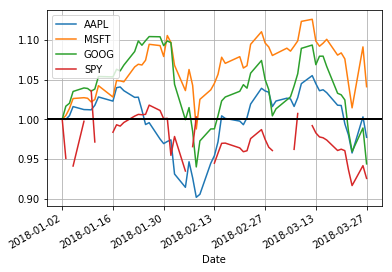

In [28]:
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

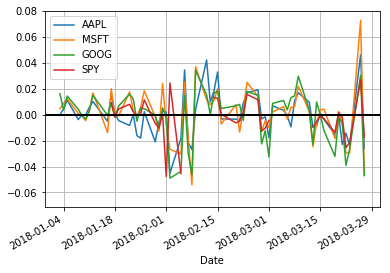

In [29]:
stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1)))
stock_change.plot(grid=True).axhline(y = 0, color = "black", lw = 2)

## Classical Risk Metrics

From what we have so far we can already compute informative metrics for our stocks, which can be considered some measure of risk.

First, we will want to annualize our returns, thus computing the annual percentage rate (APR). This helps us keep returns on a common time scale.

In [30]:
stock_change_apr = stock_change * 252 * 100    # There are 252 trading days in a year; the 100 converts to percentages
stock_change_apr.tail()

,AAPL,MSFT,GOOG,SPY
Date,,,,
2018-03-21,-577.463148,-176.499833,-157.285338,-48.409635
2018-03-22,-359.355133,-743.873619,-984.592233,-637.937081
2018-03-23,-589.663945,-743.366326,-669.637836,-542.932908
2018-03-26,1168.762361,1839.012005,768.649993,680.185034
2018-03-27,-654.582257,-1185.615651,-1178.241231,-432.385872
